In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
songs_df = pd.read_csv('dataset.csv')
songs_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
songs_df[songs_df['track_id'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


[ 'danceability', 'energy', 'key', 'loudness', 'speechiness',
                                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature' ]

Dropping columns

In [4]:
exclude_columns = ['artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'mode', 'track_genre']
songs_df = songs_df.drop(columns=exclude_columns)
songs_df.columns

Index(['track_id', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

# Normalizing Values

In [5]:
track_ids = songs_df['track_id']

data_to_normalize = songs_df.drop(columns=['track_id'])
normalize_columns = data_to_normalize.columns

scaler = StandardScaler()
normalize_data = scaler.fit_transform(data_to_normalize)

normalized_songs_df = pd.DataFrame(normalize_data, columns=normalize_columns)
normalized_songs_df.insert(0, 'track_id', track_ids)
normalized_songs_df.head()

,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,1.782627,0.629244,-0.717148,-1.210442,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.221823
1,4qPNDBW1i3p13qLCt0Ki3A,0.975633,-0.845908,-1.889980,-1.210442,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,0.221823
2,1iJBSr7s7jYXzM8EGcbK5b,1.065299,-0.742186,-1.122669,-1.491343,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0.221823
3,6lfxq3CG4xtTiEg7opyCyx,1.692961,-1.733304,-2.312994,-1.491343,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,-2.089680
4,5vjLSffimiIP26QG5WcN2K,2.186125,0.295030,-0.788711,-0.929541,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0.221823


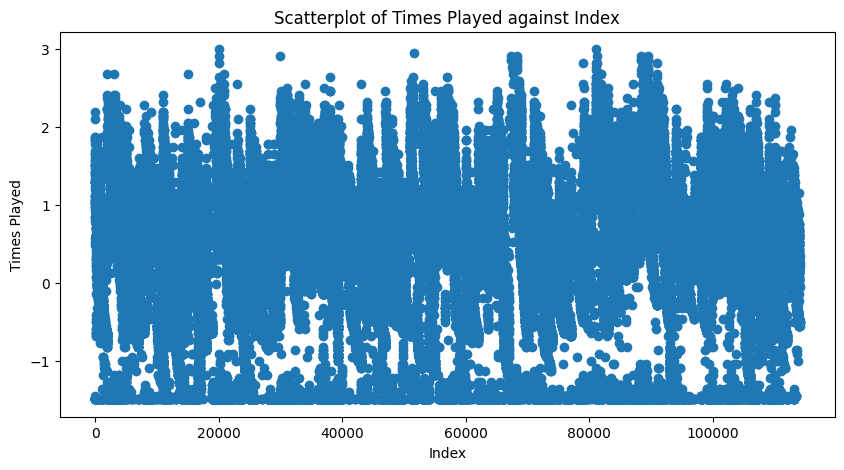

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(normalized_songs_df.index, normalized_songs_df['popularity'])
plt.xlabel('Index')
plt.ylabel('Times Played')
plt.title('Scatterplot of Times Played against Index')
plt.show()

## Adding Populaity weight to other data features

In [7]:
for column in normalized_songs_df.columns[2:]:
    normalized_songs_df[column] = normalized_songs_df[column] * normalized_songs_df['popularity']

#popularity column removed after applying weights to other data features

normalized_songs_df = normalized_songs_df.drop(columns=['popularity'])
normalized_songs_df.head()

,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,1.121708,-1.278407,-2.157767,0.536265,0.983738,-1.515592,-0.898638,1.352556,1.656606,-2.035516,0.395428
1,4qPNDBW1i3p13qLCt0Ki3A,-0.825295,-1.843926,-1.180947,-1.741254,-0.077068,1.787098,-0.491810,-0.576804,-0.779228,-1.453416,0.216418
2,1iJBSr7s7jYXzM8EGcbK5b,-0.790650,-1.195978,-1.588726,-0.312440,-0.291706,-0.336100,-0.537030,-0.540284,-1.454866,-1.628109,0.236308
3,6lfxq3CG4xtTiEg7opyCyx,-2.934417,-3.915809,-2.524787,-3.452374,-0.774206,3.004317,-0.853055,-0.725224,-2.161868,3.365368,-3.537747
4,5vjLSffimiIP26QG5WcN2K,0.644972,-1.724219,-2.032093,-0.618127,-0.662713,1.013047,-1.102051,-1.500305,-2.589252,-0.160348,0.484933


# Saving the normalized data into a csv file

In [8]:
normalized_songs_df.to_csv("Normalized Dataset.csv")